In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, confusion_matrix, classification_report
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import xgboost as xgb

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Bring in 10,000 rows of the full dataframe to reserve computing power
filename = "data/trips/full.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
sample_ride_df = pd.read_csv(filename, skiprows=skip)

In [4]:
# Check length
len(sample_ride_df)

10000

In [5]:
# Convert start and end dates to datetimes
sample_ride_df['start_date'] = pd.to_datetime(sample_ride_df['start_date'])
sample_ride_df['end_date'] = pd.to_datetime(sample_ride_df['end_date'])

In [7]:
# Set the start date as the index
sample_ride_df = sample_ride_df.set_index('start_date')

In [1]:
# Create a "Month column
sample_ride_df['month'] = sample_ride_df.index.month

In [9]:
# Set columns of interest
model_ride_df = sample_ride_df[['month', 'day_of_week', 'start_hour', 'HourlyDryBulbTemperature', 'precip_cat']]

In [10]:
# Create dummy variables
model_ride_df.dtypes

month                         int64
day_of_week                  object
start_hour                    int64
HourlyDryBulbTemperature    float64
precip_cat                   object
dtype: object

In [11]:
dummy_model_ride_df = pd.get_dummies(model_ride_df, drop_first=True, columns=['month', 'day_of_week', 'start_hour', 'precip_cat'])

In [12]:
ride_counts = dummy_model_ride_df.resample('H').count()

In [13]:
hourly_dummy_model_ride = dummy_model_ride_df.resample('H').mean()

In [14]:
hourly_dummy_model_ride['ride_count'] = ride_counts['month_2']

In [15]:
hourly_dummy_model_ride

HourlyDryBulbTemperature  month_2  month_3  month_4  \
start_date                                                                 
2010-09-22 09:00:00                      77.0      0.0      0.0      0.0   
2010-09-22 10:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 11:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 12:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 13:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 14:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 15:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 16:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 17:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 18:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 19:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 20:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 21:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 22:00:00                       NaN      NaN      NaN      NaN   
2010-09-22 23:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 00:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 01:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 02:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 03:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 04:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 05:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 06:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 07:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 08:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 09:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 10:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 11:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 12:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 13:00:00                       NaN      NaN      NaN      NaN   
2010-09-23 14:00:00                       NaN      NaN      NaN      NaN   
...                                       ...      ...      ...      ...   
2019-10-30 14:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 15:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 16:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 17:00:00                      62.0      0.0      0.0      0.0   
2019-10-30 18:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 19:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 20:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 21:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 22:00:00                       NaN      NaN      NaN      NaN   
2019-10-30 23:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 00:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 01:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 02:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 03:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 04:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 05:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 06:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 07:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 08:00:00                       NaN      NaN      NaN      NaN   
2019-10-31 09:00:00                       NaN      NaN      NaN      

In [16]:
hourly_dummy_model_ride = hourly_dummy_model_ride.fillna(0)

In [17]:
y_data = hourly_dummy_model_ride[['ride_count']]

In [18]:
x_data = hourly_dummy_model_ride.drop(columns=['ride_count'])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=32, test_size=.2)

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
x_train_scaled = scaler.transform(x_train)

In [23]:
x_train_scaled

array([[-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743],
       [-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743],
       [-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743],
       ...,
       [-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743],
       [-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743],
       [-0.34183108, -0.07337317, -0.08882802, ..., -0.04568113,
        -0.07956342, -0.05998743]])

In [24]:
x_test_scaled = scaler.transform(x_test)

## Linear Regression

## SKLearn

In [25]:
regr = linear_model.LinearRegression()
regr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regr.predict(x_test_scaled)

In [27]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.11245135  0.00773034  0.00954325  0.00986047  0.00358004  0.0026217
  -0.00170125 -0.00156377  0.00169703  0.00770159  0.01116379  0.00735805
   0.00335641  0.01007747  0.00551888  0.00331109  0.00379767  0.00395535
   0.01497752  0.01435685  0.01024458  0.00578768  0.01874415  0.0323771
   0.05458845  0.07192997  0.05111843  0.04426055  0.04843364  0.05356372
   0.05098863  0.05000873  0.05364371  0.06571077  0.08062865  0.07540878
   0.05681265  0.04864377  0.04165597  0.03583608  0.02953961 -0.00181456
  -0.00113291]]
Mean squared error: 0.01
Variance score: 0.89


## SM

In [28]:
X = sm.add_constant(x_train_scaled)

In [29]:
model = sm.OLS(y_train, X, hasconst=True)

In [30]:
res = model.fit()

In [31]:
res.summary(xname=['const']+list(x_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ride_count   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.160e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:23:11   Log-Likelihood:                 41434.
No. Observations:               63868   AIC:                        -8.278e+04
Df Residuals:                   63824   BIC:                        -8.238e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1248      0.001    249.354      0.000       0.124       0.126
HourlyDryBulbTemperature     0.1125      0.004     28.704      0.000       0.105       0.120
month_2                      0.0077      0.001     11.220      0.000       0.006       0.009
month_3                      0.0095      0.001     12.112      0.000       0.008       0.011
month_4                      0.0099      0.001     10.374      0.000       0.008       0.012
month_5                      0.0036      0.001      3.314      0.001       0.001       0.006
month_6                      0.0026      0.001      2.178      0.029       0.000       0.005
month_7                     -0.0017      0.001     -1.325      0.185      -0.004       0.001
month_8                     -0.0016      0.001     -1.259      0.208      -0.004       0.001
month_9                      0.0017      0.001      1.465      0.143      -0.001       0.004
month_10                     0.0077      0.001      7.831      0.000       0.006       0.010
month_11                     0.0112      0.001     14.573      0.000       0.010       0.013
month_12                     0.0074      0.001     10.692      0.000       0.006       0.009
day_of_week_Monday           0.0034      0.001      4.949      0.000       0.002       0.005
day_of_week_Saturday         0.0101      0.001     14.762      0.000       0.009       0.011
day_of_week_Sunday           0.0055      0.001      8.051      0.000       0.004       0.007
day_of_week_Thursday         0.0033      0.001      4.740      0.000       0.002       0.005
day_of_week_Tuesday          0.0038      0.001      5.496      0.000       0.002       0.005
day_of_week_Wednesday        0.0040      0.001      5.638      0.000       0.003       0.005
start_hour_1                 0.0150      0.001     27.452      0.000       0.014       0.016
start_hour_2                 0.0144      0.001     26.392      0.000       0.013       0.015
start_hour_3                 0.0102      0.001     19.703      0.000       0.009       0.011
start_hour_4                 0.0058      0.001     11.394      0.000       0.005       0.007
start_hour_5                 0.0187      0.001     33.845      0.000       0.018       0.020
start_hour_6                 0.0324      0.001     51.162      0.000       0.031       0.034
start_hour_7                 0.0546      0.001     69.274      0.000       0.053       0.056
start_hour_8                 0.0719      0.001     78.107      0.000       0.070       0.074
start_hour_9                 0.0511      0.001     61.921      0.000       0.050       0.053
start_hour_10                0.0443      0.001     56.151      0.000       0.043       0.046
start_hour_11                0.0484      0.001     56.088      0.000       0.047       0.050
start_hour_12 

## More Data

In [32]:
all_rides_df = pd.read_csv('data/trips/full.csv')

In [33]:
all_rides_df.head()

Unnamed: 0  duration           start_date             end_date  \
0           0      1012  2010-09-20 11:27:04  2010-09-20 11:43:56   
1           1        61  2010-09-20 11:41:22  2010-09-20 11:42:23   
2           2      2690  2010-09-20 12:05:37  2010-09-20 12:50:27   
3           3      1406  2010-09-20 12:06:05  2010-09-20 12:29:32   
4           4      1413  2010-09-20 12:10:43  2010-09-20 12:34:17   

                   start_station                    end_station member_type  \
0       M St & New Jersey Ave SE                  4th & M St SW      Member   
1                 1st & N St  SE                 1st & N St  SE      Member   
2                  5th & K St NW  19th St & Pennsylvania Ave NW      Member   
3                  5th & K St NW        Park Rd & Holmead Pl NW      Member   
4  19th St & Pennsylvania Ave NW                 15th & P St NW      Member   

   start_lat  start_lon  region_id  \
0   38.87630 -77.003700         42   
1   38.87430 -77.005700         42   
2   38.90304 -77.019027         42   
3   38.90304 -77.019027         42   
4   38.90030 -77.042900         42   

                                  start_neighborhood   end_lat    end_lon  \
0                          Near Southeast, Navy Yard  38.87670 -77.017800   
1                          Near Southeast, Navy Yard  38.87430 -77.005700   
2  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.90030 -77.042900   
3  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.93080 -77.031500   
4         Dupont Circle, Connecticut Avenue/K Street  38.90985 -77.034438   

                                    end_neighborhood day_of_week  start_hour  \
0  Southwest Employment Area, Southwest/Waterfron...      Monday          11   
1                          Near Southeast, Navy Yard      Monday          11   
2         Dupont Circle, Connecticut Avenue/K Street      Monday          12   
3  Columbia Heights, Mt. Pleasant, Pleasant Plain...      Monday          12   
4                                 Shaw, Logan Circle      Monday          12   

   HourlyDryBulbTemperature precip_cat  distance  
0                      75.0          N  0.760781  
1                      75.0          N  0.000000  
2                      77.0          N  1.300599  
3                      77.0          N  2.029455  
4                      77.0          N  0.801245

In [34]:
all_rides_df.dtypes

Unnamed: 0                    int64
duration                      int64
start_date                   object
end_date                     object
start_station                object
end_station                  object
member_type                  object
start_lat                   float64
start_lon                   float64
region_id                     int64
start_neighborhood           object
end_lat                     float64
end_lon                     float64
end_neighborhood             object
day_of_week                  object
start_hour                    int64
HourlyDryBulbTemperature    float64
precip_cat                   object
distance                    float64
dtype: object

In [35]:
all_rides_df['start_date'] = pd.to_datetime(all_rides_df['start_date'])
all_rides_df['end_date'] = pd.to_datetime(all_rides_df['end_date'])
all_rides_df = all_rides_df.set_index('start_date')

In [36]:
df_2018 = all_rides_df.loc['2018-01-01':'2018-12-31']
df_2019 = all_rides_df.loc['2019-01-01':'2019-12-31']

In [37]:
df_2018['month'] = df_2018.index.month
df_2019['month'] = df_2019.index.month

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [38]:
model_ride_df_2018 = df_2018[['month', 'day_of_week', 'start_hour', 'HourlyDryBulbTemperature', 'precip_cat']]
model_ride_df_2019 = df_2019[['month', 'day_of_week', 'start_hour', 'HourlyDryBulbTemperature', 'precip_cat']]

In [39]:
dummy_model_ride_df_2018 = pd.get_dummies(model_ride_df_2018, drop_first=True, columns=['month', 'day_of_week', 'start_hour', 'precip_cat'])
dummy_model_ride_df_2019 = pd.get_dummies(model_ride_df_2019, drop_first=True, columns=['month', 'day_of_week', 'start_hour', 'precip_cat'])

In [40]:
ride_counts_2018 = dummy_model_ride_df_2018.resample('H').count()
ride_counts_2019 = dummy_model_ride_df_2019.resample('H').count()

In [41]:
hourly_dummy_model_ride_2018 = dummy_model_ride_df_2018.resample('H').mean()
hourly_dummy_model_ride_2019 = dummy_model_ride_df_2019.resample('H').mean()

In [42]:
hourly_dummy_model_ride_2018['ride_count'] = ride_counts_2018['month_2']
hourly_dummy_model_ride_2019['ride_count'] = ride_counts_2019['month_2']
hourly_dummy_model_ride_2019['month_11'] = None
hourly_dummy_model_ride_2019['month_12'] = None

In [43]:
hourly_dummy_model_ride_2019 = hourly_dummy_model_ride_2019.fillna(0)
hourly_dummy_model_ride_2018 = hourly_dummy_model_ride_2018.fillna(0)

## Split Data

In [44]:
y_train = hourly_dummy_model_ride_2018[['ride_count']]
x_train = hourly_dummy_model_ride_2018.drop(columns=['ride_count'])
y_test = hourly_dummy_model_ride_2019[['ride_count']]
x_test = hourly_dummy_model_ride_2019.drop(columns=['ride_count'])

In [45]:
y_test_df = y_test

In [46]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
regr = linear_model.LinearRegression()
regr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = regr.predict(x_test_scaled)

In [49]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[108.43106249  -2.9316302    8.79556265  21.41161648   6.99095991
    6.25194983   0.70934792  -3.17712148  -7.16399009   8.75004051
   -5.65673517 -18.95608877 -15.07816761  -5.48107078 -21.23256359
   -5.68777535  -9.39307497  -5.58714974  -9.73152324 -12.54300964
  -14.01101059 -12.96866178  -3.78203563  21.12574757  67.88087754
  115.11401037  60.1386506   43.19046511  52.28943192  65.15024871
   65.68977051  62.81995864  74.33328588 100.31536623 149.53410704
  118.95856952  76.10930169  47.72653484  31.59053747  19.05942072
    6.15067336 -27.52239556 -58.41233115]]
Mean squared error: 81836.69
Variance score: 0.20


## SM

In [50]:
X = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, X, hasconst=True)
res = model.fit()
res.summary(xname=['const']+list(x_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ride_count   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     512.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:28:16   Log-Likelihood:                -57550.
No. Observations:                8760   AIC:                         1.152e+05
Df Residuals:                    8716   BIC:                         1.155e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      334.3916      1.848    180.913      0.000     330.768     338.015
HourlyDryBulbTemperature   108.4311      4.064     26.684      0.000     100.466     116.397
month_2                     -2.9316      2.518     -1.164      0.244      -7.867       2.004
month_3                      8.7956      2.541      3.462      0.001       3.815      13.776
month_4                     21.4116      2.750      7.786      0.000      16.021      26.802
month_5                      6.9910      3.383      2.067      0.039       0.360      13.622
month_6                      6.2519      3.510      1.781      0.075      -0.629      13.133
month_7                      0.7093      3.757      0.189      0.850      -6.655       8.073
month_8                     -3.1771      3.744     -0.849      0.396     -10.515       4.161
month_9                     -7.1640      3.489     -2.053      0.040     -14.004      -0.324
month_10                     8.7500      3.017      2.900      0.004       2.836      14.664
month_11                    -5.6567      2.581     -2.191      0.028     -10.717      -0.597
month_12                   -18.9561      2.529     -7.495      0.000     -23.914     -13.999
day_of_week_Monday         -15.0782      2.413     -6.248      0.000     -19.808     -10.348
day_of_week_Saturday        -5.4811      2.402     -2.282      0.022     -10.189      -0.773
day_of_week_Sunday         -21.2326      2.407     -8.822      0.000     -25.950     -16.515
day_of_week_Thursday        -5.6878      2.409     -2.361      0.018     -10.410      -0.966
day_of_week_Tuesday         -9.3931      2.404     -3.907      0.000     -14.106      -4.680
day_of_week_Wednesday       -5.5871      2.408     -2.321      0.020     -10.307      -0.868
start_hour_1                -9.7315      2.495     -3.900      0.000     -14.623      -4.840
start_hour_2               -12.5430      2.486     -5.045      0.000     -17.417      -7.669
start_hour_3               -14.0110      2.483     -5.643      0.000     -18.878      -9.144
start_hour_4               -12.9687      2.494     -5.201      0.000     -17.857      -8.081
start_hour_5                -3.7820      2.496     -1.515      0.130      -8.676       1.112
start_hour_6                21.1257      2.498      8.458      0.000      16.229      26.022
start_hour_7                67.8809      2.499     27.165      0.000      62.982      72.779
start_hour_8               115.1140      2.503     45.994      0.000     110.208     120.020
start_hour_9                60.1387      2.507     23.991      0.000      55.225      65.052
start_hour_10               43.1905      2.516     17.165      0.000      38.258      48.123
start_hour_11               52.2894      2.526     20.698      0.000      47.337      57.242
start_hour_12 

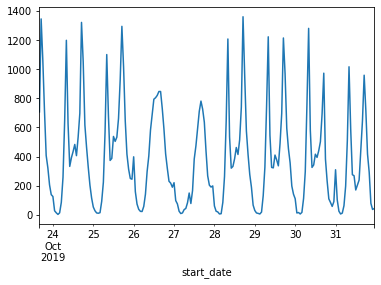

In [51]:
y_test_df['ride_count'][-200:].plot()

In [52]:
y_test_df['sm_pred'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



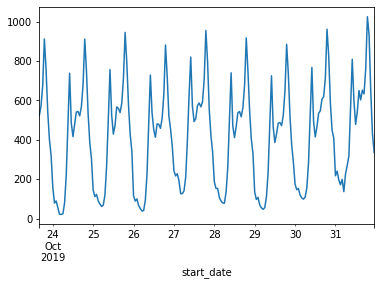

In [53]:
y_test_df['sm_pred'][-200:].plot()

## Decision Trees

In [54]:
clf = DecisionTreeRegressor(max_depth=20)
clf.fit(x_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
y_pred = clf.predict(x_test_scaled)

In [56]:
y_test_df['dt_20_pred'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



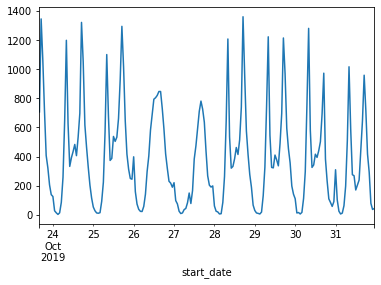

In [57]:
y_test_df['ride_count'][-200:].plot()

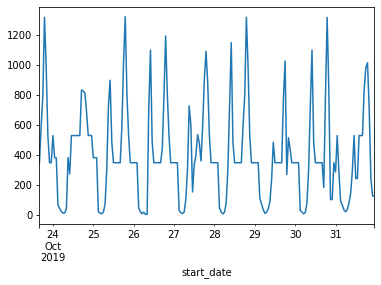

In [58]:
y_test_df['dt_20_pred'][-200:].plot()

In [59]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test['ride_count'], y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test['ride_count'], y_pred))

Mean squared error: 117340.82
Variance score: -0.15


range(0, 43)


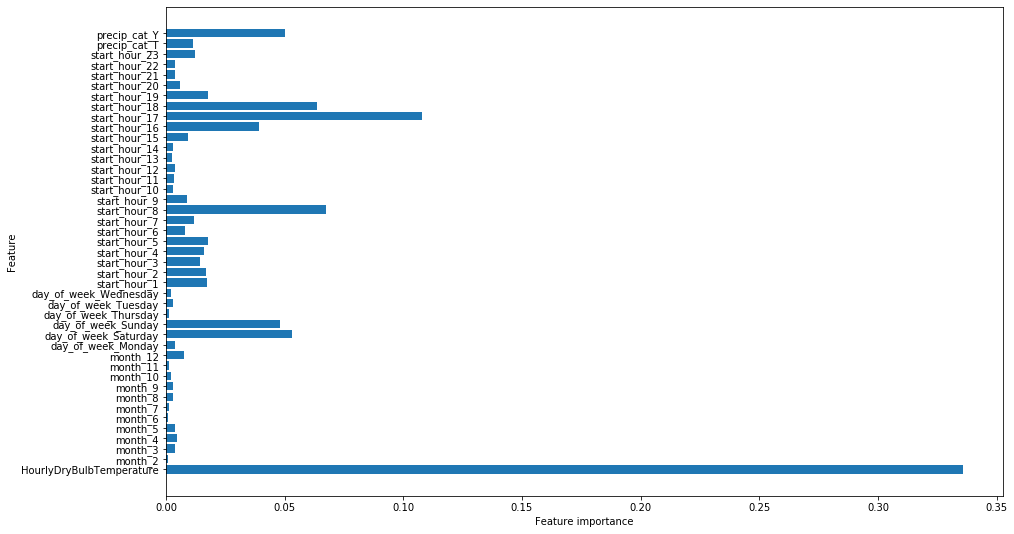

In [60]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(15,9))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    print(range(n_features))

plot_feature_importances(clf)

## Small Tree for Vizualization

In [61]:
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(x_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [62]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=x_train.columns, rotate=True, )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [63]:
graph

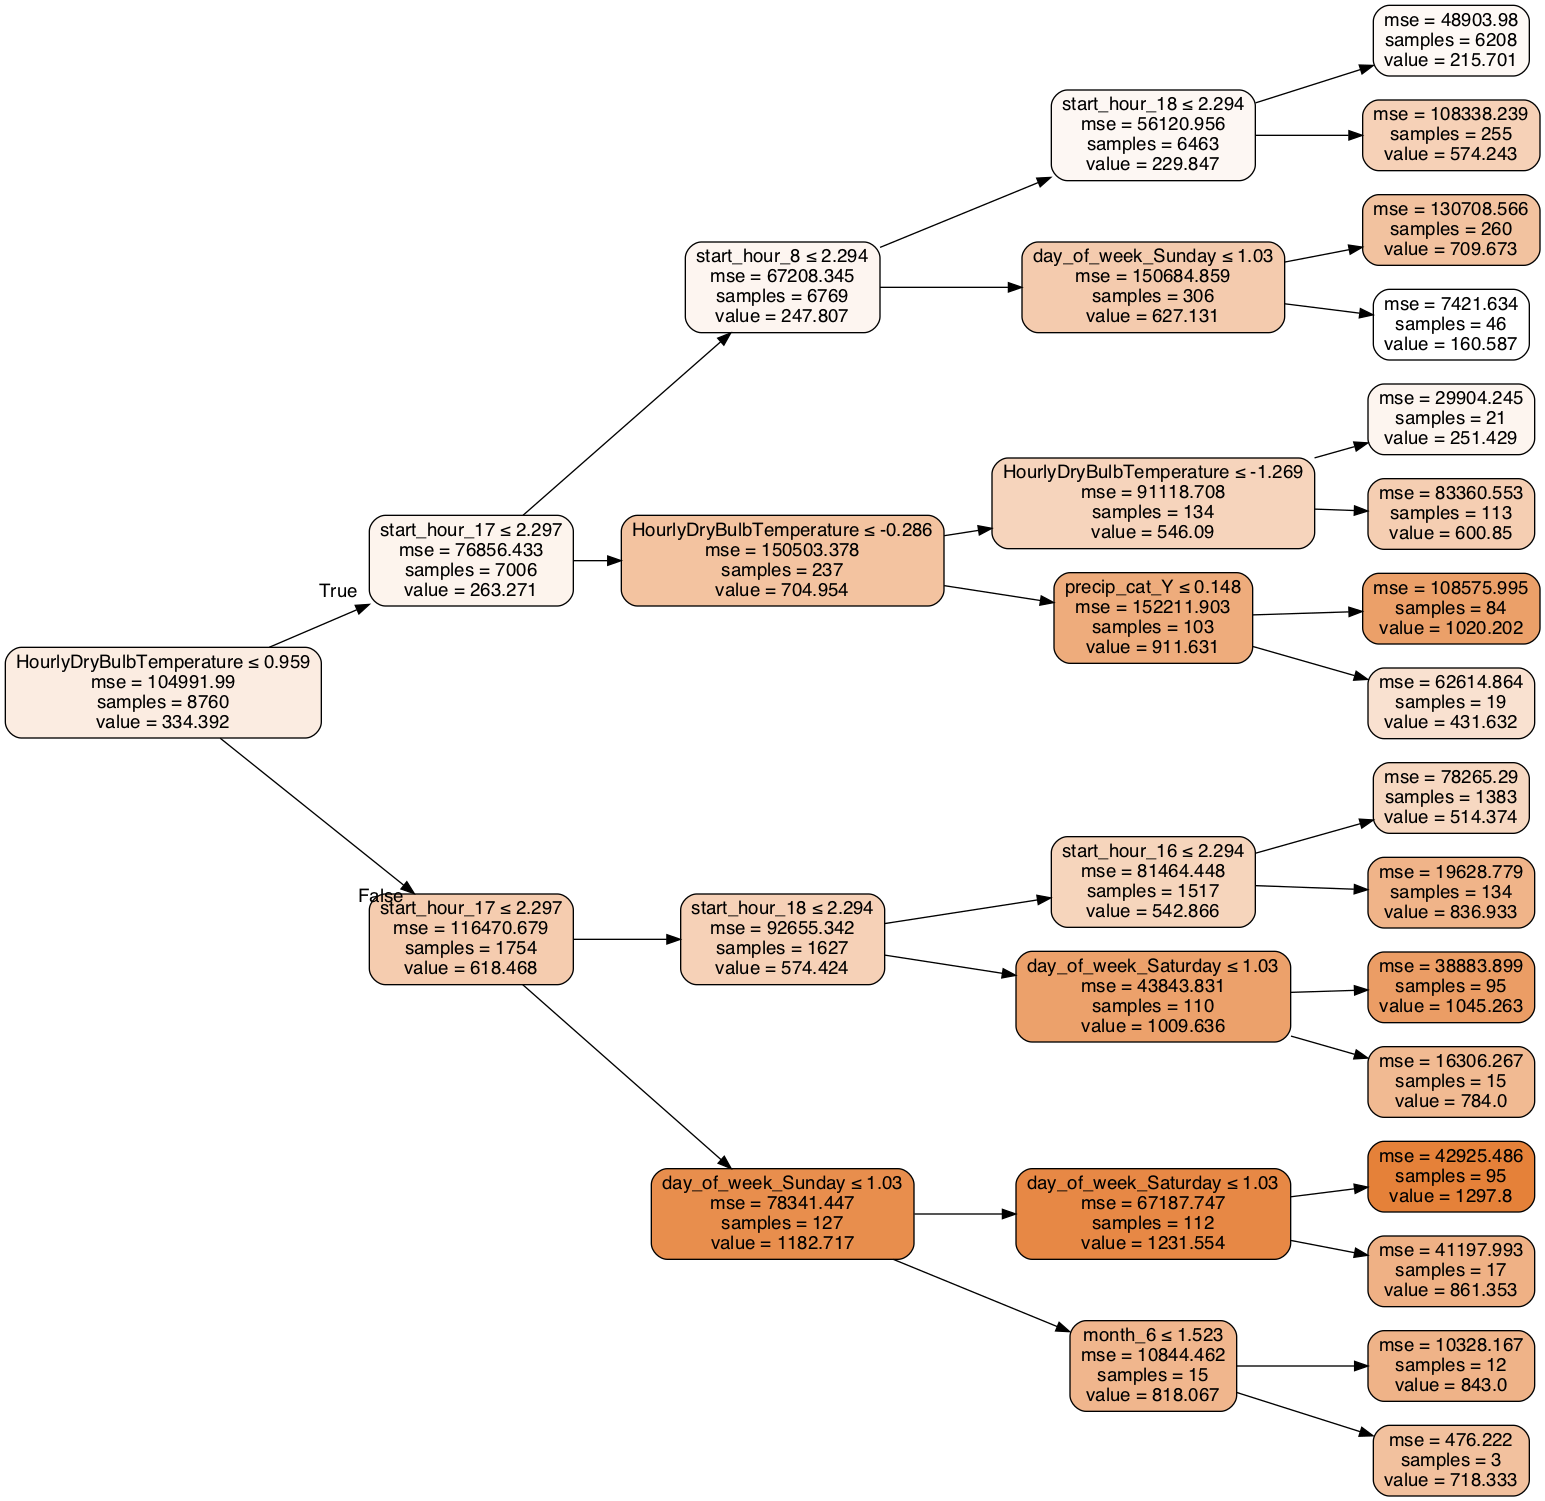

In [64]:
Image(graph.create_png())

range(0, 43)


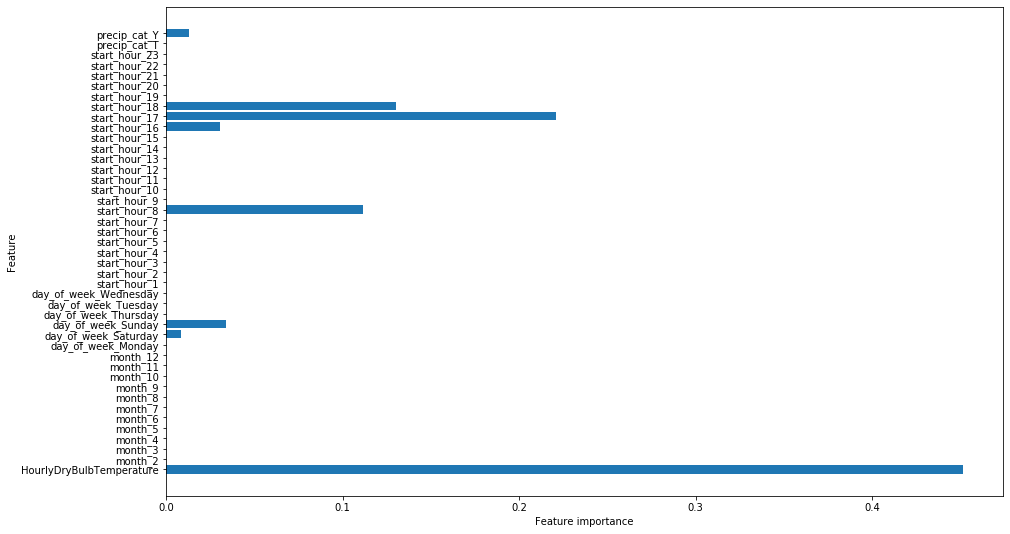

In [65]:
plot_feature_importances(clf)

In [66]:
y_pred = clf.predict(x_test_scaled)

In [67]:
y_test_df['dt_4_pred'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



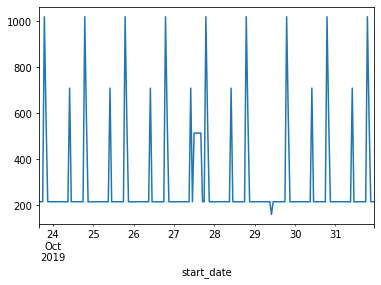

In [68]:
y_test_df['dt_4_pred'][-200:].plot()

## Better Prediction/Actual Graphs

In [69]:
# Make subplot figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces; weekday and weekend aggregate rides
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['ride_count'], name="Actual Number of Rides Each Hour",
                         line_color='red'))
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['dt_4_pred'], name="Predicted Rides Each Hour",
                         line_color='black'), secondary_y=False)

fig.update_layout(title_text='Predicted and Actual Rides Each Hour')

# Set x-axis title
fig.update_xaxes(title_text="Hour of Day")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Numer of Rides</b> initiated", secondary_y=False)
fig.update_yaxes(title_text="<b>Rides</b>", secondary_y=False)

# Include x-axis slider
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
forest = RandomForestRegressor(n_estimators=100, max_depth=200)
forest.fit(x_train_scaled, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
forest.score(x_train_scaled, y_train)

0.9859746377385114

In [73]:
forest.score(x_test_scaled, y_test['ride_count'])

0.0018534813702066888

In [74]:
y_pred = forest.predict(x_test_scaled)

In [75]:
y_test_df['rf1_pred'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



range(0, 43)


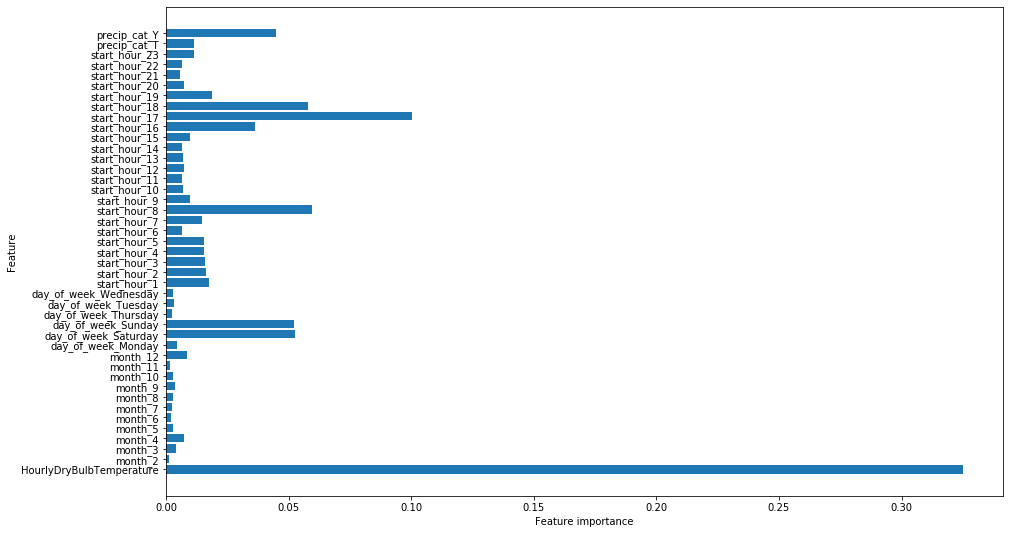

In [76]:
plot_feature_importances(forest)

In [77]:
# Make subplot figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces; weekday and weekend aggregate rides
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['ride_count'], name="Actual Number of Rides Each Hour",
                         line_color='red'))
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['rf1_pred'], name="Predicted Rides Each Hour",
                         line_color='black'), secondary_y=False)

fig.update_layout(title_text='Predicted and Actual Rides Each Hour')

# Set x-axis title
fig.update_xaxes(title_text="Hour of Day")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Numer of Rides</b> initiated", secondary_y=False)
fig.update_yaxes(title_text="<b>Rides</b>", secondary_y=False)

# Include x-axis slider
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

## Converting Time Features to Circular

In [80]:
all_rides_df['hour_x']=np.sin(2.*np.pi*all_rides_df.start_hour/24.)
all_rides_df['hour_y']=np.cos(2.*np.pi*all_rides_df.start_hour/24.)

In [82]:
all_rides_df['month'] = all_rides_df.index.month
all_rides_df['month_x']=np.sin(2.*np.pi*all_rides_df.month/12.)
all_rides_df['month_y']=np.cos(2.*np.pi*all_rides_df.month/12.)

In [84]:
def weekday_or_weekend(row):
    if row['day_of_week'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'Weekday'
    else:
        return 'Weekend'

In [106]:
all_rides_df['weekday_weekend'] = all_rides_df.apply(weekday_or_weekend, axis=1)

In [107]:
new_model_ride_df = all_rides_df[['HourlyDryBulbTemperature', 'precip_cat', 'hour_x', 'hour_y', 'month_x', 'month_y', 'weekday_weekend']]

In [108]:
neighborhood_model_df = all_rides_df[['start_neighborhood', 'HourlyDryBulbTemperature', 'precip_cat', 'hour_x', 'hour_y', 'month_x', 'month_y', 'weekday_weekend']]

In [109]:
neighborhood_model_df.to_csv('data/trips/neighborhood_model.csv')

In [110]:
new_df_2018 = new_model_ride_df.loc['2018-01-01':'2018-12-31']
new_df_2019 = new_model_ride_df.loc['2019-01-01':'2019-12-31']

In [111]:
new_df_2018.head()

HourlyDryBulbTemperature precip_cat  hour_x  hour_y  \
start_date                                                                 
2018-01-01 00:05:06                      17.0          N     0.0     1.0   
2018-01-01 00:14:30                      17.0          N     0.0     1.0   
2018-01-01 00:14:53                      17.0          N     0.0     1.0   
2018-01-01 00:15:31                      17.0          N     0.0     1.0   
2018-01-01 00:18:02                      17.0          N     0.0     1.0   

                     month_x   month_y weekday_weekend  
start_date                                              
2018-01-01 00:05:06      0.5  0.866025         Weekday  
2018-01-01 00:14:30      0.5  0.866025         Weekday  
2018-01-01 00:14:53      0.5  0.866025         Weekday  
2018-01-01 00:15:31      0.5  0.866025         Weekday  
2018-01-01 00:18:02      0.5  0.866025         Weekday

In [112]:
dummy_model_ride_df_2018 = pd.get_dummies(new_df_2018, drop_first=True, columns=['precip_cat', 'weekday_weekend'])
dummy_model_ride_df_2019 = pd.get_dummies(new_df_2019, drop_first=True, columns=['precip_cat', 'weekday_weekend'])

In [113]:
dummy_model_ride_df_2018

HourlyDryBulbTemperature    hour_x    hour_y  \
start_date                                                          
2018-01-01 00:05:06                      17.0  0.000000  1.000000   
2018-01-01 00:14:30                      17.0  0.000000  1.000000   
2018-01-01 00:14:53                      17.0  0.000000  1.000000   
2018-01-01 00:15:31                      17.0  0.000000  1.000000   
2018-01-01 00:18:02                      17.0  0.000000  1.000000   
2018-01-01 00:18:07                      17.0  0.000000  1.000000   
2018-01-01 00:22:10                      17.0  0.000000  1.000000   
2018-01-01 00:23:41                      17.0  0.000000  1.000000   
2018-01-01 00:26:05                      17.0  0.000000  1.000000   
2018-01-01 00:28:37                      17.0  0.000000  1.000000   
2018-01-01 00:33:15                      17.0  0.000000  1.000000   
2018-01-01 00:33:20                      17.0  0.000000  1.000000   
2018-01-01 00:37:39                      17.0  0.000000  1.000000   
2018-01-01 00:37:44                      17.0  0.000000  1.000000   
2018-01-01 00:38:51                      17.0  0.000000  1.000000   
2018-01-01 00:39:19                      17.0  0.000000  1.000000   
2018-01-01 00:39:24                      17.0  0.000000  1.000000   
2018-01-01 00:42:07                      17.0  0.000000  1.000000   
2018-01-01 00:42:08                      17.0  0.000000  1.000000   
2018-01-01 00:50:34                      17.0  0.000000  1.000000   
2018-01-01 00:53:30                      16.0  0.000000  1.000000   
2018-01-01 00:54:12                      16.0  0.000000  1.000000   
2018-01-01 00:59:54                      16.0  0.000000  1.000000   
2018-01-01 01:03:23                      16.0  0.258819  0.965926   
2018-01-01 01:04:18                      16.0  0.258819  0.965926   
2018-01-01 01:06:19                      16.0  0.258819  0.965926   
2018-01-01 01:06:23                      16.0  0.258819  0.965926   
2018-01-01 01:08:27                      16.0  0.258819  0.965926   
2018-01-01 01:10:25                      16.0  0.258819  0.965926   
2018-01-01 01:10:49                      16.0  0.258819  0.965926   
...                                       ...       ...       ...   
2018-12-31 22:44:01                      50.0 -0.500000  0.866025   
2018-12-31 22:45:47                      50.0 -0.500000  0.866025   
2018-12-31 22:46:10                      50.0 -0.500000  0.866025   
2018-12-31 22:47:00                      50.0 -0.500000  0.866025   
2018-12-31 22:48:38                      50.0 -0.500000  0.866025   
2018-12-31 22:55:09                      50.0 -0.500000  0.866025   
2018-12-31 22:56:04                      50.0 -0.500000  0.866025   
2018-12-31 22:58:27                      50.0 -0.500000  0.866025   
2018-12-31 23:00:27                      50.0 -0.258819  0.965926   
2018-12-31 23:01:07                      50.0 -0.258819  0.965926   
2018-12-31 23:02:13                      50.0 -0.258819  0.965926   
2018-12-31 23:08:26                      50.0 -0.258819  0.965926   
2018-12-31 23:09:28                      50.0 -0.258819  0.965926   
2018-12-31 23:09:40                      50.0 -0.258819  0.965926   
2018-12-31 23:11:23                      50.0 -0.258819  0.965926   
2018-12-31 23:11:35                      50.0 -0.258819  0.965926   
2018-12-31 23:15:45                      50.0 -0.258819  0.965926   
2018-12-31 23:19:46                      50.0 -0.258819  0.965926   
2018-12-31 23:19:50                      50.0 -0.258819  0.965926   
2018-12-31 23:20:15                      50.0 -0.258819  0.965926   
2018-12-31 23:23:31                      50.0 -0.258819  0.965926   
2018-12-31 23:25:14                      50.0 -0.258819  0.965926   
2018-12-31 23:27:10                      50.0 -0.258819  0.965926   
2018-12-31 23:27:49                      50.0 -0.258819  0.965926   
2018-12-31 23:28:50                      50.0 -0.258819  0.965926   
2018-12-31 23:29:55

In [114]:
new_hourly_dummy_model_ride_2018 = dummy_model_ride_df_2018.resample('H').mean()
new_hourly_dummy_model_ride_2019 = dummy_model_ride_df_2019.resample('H').mean()

In [115]:
ride_counts_2018 = dummy_model_ride_df_2018.resample('H').count()
ride_counts_2019 = dummy_model_ride_df_2019.resample('H').count()

In [116]:
new_hourly_dummy_model_ride_2018['ride_count'] = ride_counts_2018['hour_x']
new_hourly_dummy_model_ride_2019['ride_count'] = ride_counts_2019['hour_x']
new_hourly_dummy_model_ride_2019 = new_hourly_dummy_model_ride_2019.fillna(0)
new_hourly_dummy_model_ride_2018 = new_hourly_dummy_model_ride_2018.fillna(0)

In [117]:
y_train = new_hourly_dummy_model_ride_2018[['ride_count']]
x_train = new_hourly_dummy_model_ride_2018.drop(columns=['ride_count'])
y_test = new_hourly_dummy_model_ride_2019[['ride_count']]
x_test = new_hourly_dummy_model_ride_2019.drop(columns=['ride_count'])

In [118]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [119]:
X = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, X, hasconst=True)
res = model.fit()
res.summary(xname=['const']+list(x_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ride_count   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1230.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:20:14   Log-Likelihood:                -59770.
No. Observations:                8760   AIC:                         1.196e+05
Df Residuals:                    8751   BIC:                         1.196e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      334.3916      2.377    140.705      0.000     329.733     339.050
HourlyDryBulbTemperature    99.3226      4.586     21.657      0.000      90.333     108.313
hour_x                    -109.7365      2.466    -44.506      0.000    -114.570    -104.903
hour_y                    -143.1908      2.443    -58.616      0.000    -147.979    -138.402
month_x                      9.0926      3.296      2.758      0.006       2.631      15.554
month_y                    -25.5361      3.891     -6.562      0.000     -33.164     -17.908
precip_cat_T               -29.4733      2.380    -12.385      0.000     -34.138     -24.808
precip_cat_Y               -55.6834      2.384    -23.357      0.000     -60.357     -51.010
weekday_weekend_Weekend     -8.1243      2.381     -3.412      0.001     -12.792      -3.457
==============================================================================
Omnibus:                     1771.175   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3484.845
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       4.891   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Decision Tree

In [120]:
clf = DecisionTreeRegressor(max_depth=15)
clf.fit(x_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [121]:
y_pred = clf.predict(x_test_scaled)

range(0, 8)


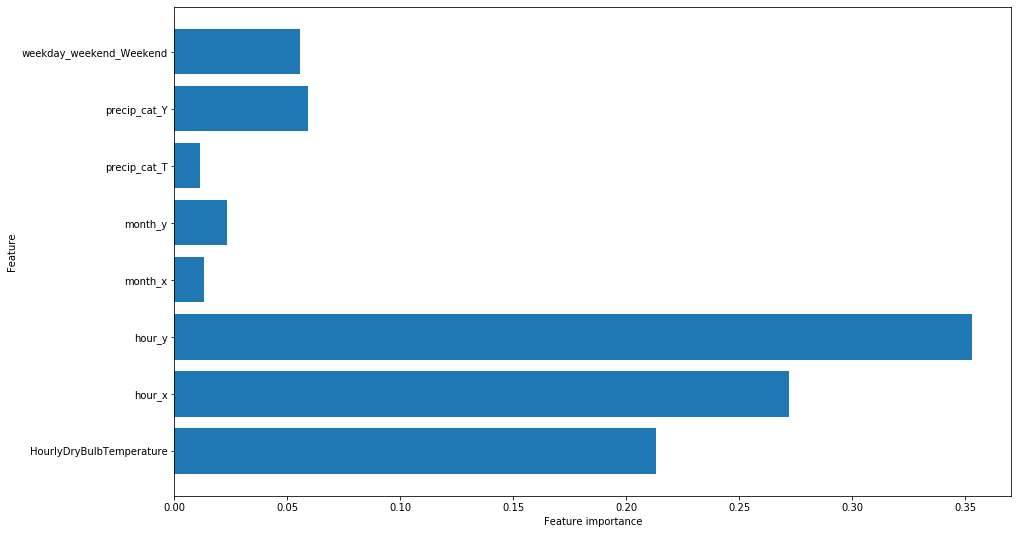

In [122]:
plot_feature_importances(clf)

In [123]:
clf.score(x_test_scaled, y_test)

0.8509919621013672

In [124]:
clf.score(x_train_scaled, y_train)

0.9838911156836838

## Random Forest

In [125]:
forest = RandomForestRegressor(n_estimators=100, max_depth=20)
forest.fit(x_train_scaled, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [126]:
forest.score(x_train_scaled, y_train)

0.9866898490369167

In [127]:
forest.score(x_test_scaled, y_test)

0.8912741759321665

range(0, 8)


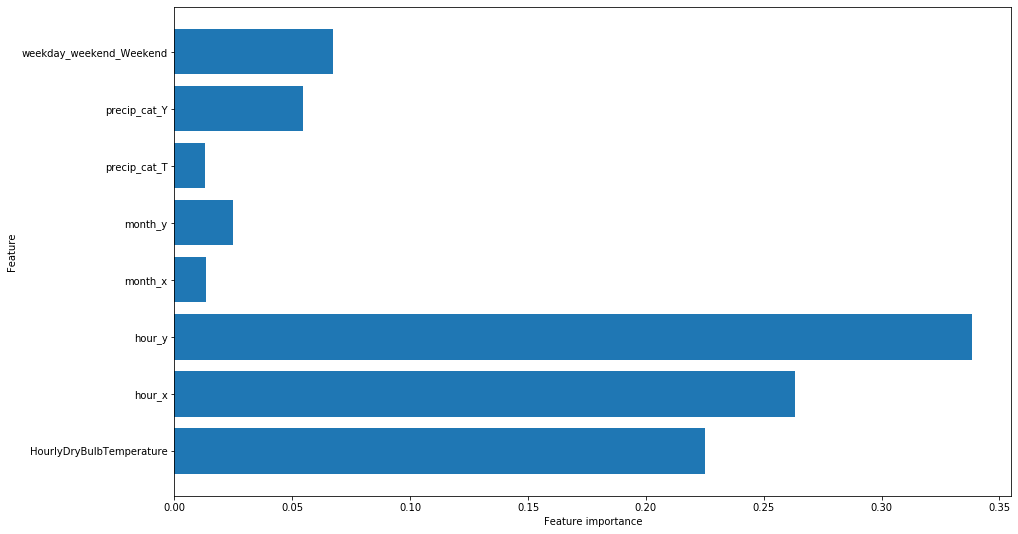

In [128]:
plot_feature_importances(forest)

In [129]:
param_grid = {
    "max_depth": [5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [10, 50, 100, 200]
}

In [130]:
forest=RandomForestRegressor()

rf_grid_search = GridSearchCV(forest, param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(x_train_scaled, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25

In [132]:
y_pred = rf_grid_search.predict(x_test_scaled)

In [133]:
rf_grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}

In [134]:
y_test_df['circular_rf'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [135]:
# Make subplot figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces; weekday and weekend aggregate rides
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['ride_count'], name="Actual Number of Rides Each Hour",
                         line_color='red'))
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['circular_rf'], name="Predicted Rides Each Hour",
                         line_color='black'), secondary_y=False)

fig.update_layout(title_text='Predicted and Actual Rides Each Hour')

# Set x-axis title
fig.update_xaxes(title_text="Hour of Day")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Numer of Rides</b> initiated", secondary_y=False)
fig.update_yaxes(title_text="<b>Rides</b>", secondary_y=False)

# Include x-axis slider
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

In [136]:
forest = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split = 10)
forest.fit(x_train_scaled, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [137]:
print(forest.score(x_train_scaled, y_train))
print(forest.score(x_test_scaled, y_test))

0.960746359701214
0.8990530323403549


## XGBoost

In [138]:
clf = xgb.XGBRegressor(max_depth=6)
clf.fit(x_train_scaled, y_train)
y_pred = clf.predict(x_test_scaled)

[16:39:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [139]:
clf.score(x_train_scaled, y_train)

0.9530680556241188

In [140]:
clf.score(x_test_scaled, y_test)

0.9004856538090322

In [142]:
y_test_df['xgb_2'] = y_pred

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



range(0, 8)


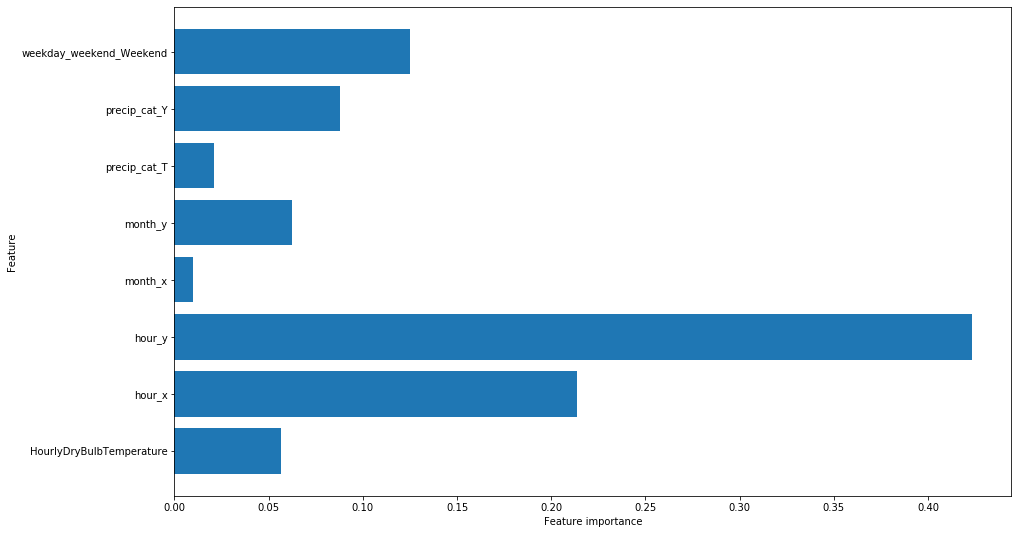

In [143]:
plot_feature_importances(clf)

In [144]:
# Make subplot figure 
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces; weekday and weekend aggregate rides
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['ride_count'], name="Actual Number of Rides Each Hour",
                         line_color='red'))
fig.add_trace(go.Scatter(x=y_test_df.index, y=y_test_df['xgb_2'], name="Predicted Rides Each Hour",
                         line_color='black'), secondary_y=False)

fig.update_layout(title_text='Predicted and Actual Rides Each Hour')

# Set x-axis title
fig.update_xaxes(title_text="Hour of Day")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Numer of Rides</b> initiated", secondary_y=False)
fig.update_yaxes(title_text="<b>Rides</b>", secondary_y=False)

# Include x-axis slider
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()